1. Extração da base de dados
2. Verificação de valores nulos
3. Divisão da base de dados por categoria
4. Limpeza e tratamento dos dados
5. EDA

    1.1)DESNUTRIÇÃO - Zonas rurais
    enteder os quais sao os grupos que tem o maior problema de desnutrição e falta de acesso a alimentação adequada
    CASOS DE NANISMO = Existe correlação?
    
    1.2) DESCAPACIDADE & GRUPOS PRIORITÁRIOS (ENFERMIDADES CRÔNICAS)
    Como entender o crescimento (predições) desses grupos de saúde para facilitar os planos de contingenciamento da karla, ou seja, fazer predições futuras

In [1]:
# configurações de diretórios
import os

# manipulação e operação dos dados
import numpy as np
import pandas as pd

# visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

In [2]:
#configurações adicionais de visualização dos dados
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
sns.set_style(style='darkgrid')

In [3]:
BASE_DIR = os.path.join( os.path.abspath('.') ) # diretório raiz do projeto
DATA_DIR = os.path.join( BASE_DIR, 'data' ) # diretório dos dados

In [4]:
data = pd.read_excel( os.path.join( DATA_DIR, 'PRAS Y RDACAA 2020.xlsx' ) ) # extração dos dados

In [5]:
data.sample(3)

,ID,ENT_ID,ENT_RUC,ENT_NOM,ENT_SIM_TIP_EST,ENT_DES_TIP_EST,ENT_COD_PROV,ENT_DES_PROV,ENT_COD_CANT,ENT_DES_CANT,ENT_COD_PARR,ENT_DES_PARR,ENT_DES_TIP_PARR,ENT_INT,ENT_NIV,ENT_COD_ZON,ENT_DES_ZON,ENT_COD_DIS,ENT_DIST_DIS,ENT_COD_CIR,PROF_NOMBRECOMPLETO,PROF_NOMBRES,PROF_APELLIDOS,PROF_FEC_NAC,PROF_SEXO,PROF_TIP_IDEN,PROF_IDEN,PROF_ESP_ATE,PROF_REG_NRO,PROF_CORREO,PCTE_NOM,PCTE_NOMBRES,PCTE_APELLIDOS,PCTE_TIP_IDEN,PCTE_IDE,PCTE_SEXO,PCTE_ORI_SEX,PCTE_IDE_GEN,PCTE_FEC_NAC,PCTE_ANIOS,PCTE_MESES,PCTE_DIAS,PCTE_EDAD_COMPUESTA,PCTE_ANIOS_EN_MESES,PCTE_IDE_REP,PCTE_NACIONALIDAD,PCTE_AUTID_ETN,PCTE_NAC_ETN,PCTE_PUEBLO,PCTE_TEL_CEL,PCTE_TEL_CON,PCTE_TIP_BON,PCTE_SEG,PCTE_GRP_PRI,PCTE_COD_PROV,PCTE_DES_PROV,PCTE_COD_CANT,PCTE_DES_CANT,PCTE_PARR,PCTE_DES_PARR,PCTE_DIR_CALL_PRI,PCTE_DIR_CALL_SEC,PCTE_DIR_REF,PCTE_DIR_BARR,PCTE_PESO,PCTE_TALLA,PCTE_ULT_PESO,PCTE_ULT_TALLA,PCTE_ULT_IMC,PCTE_ULT_PERIM_CEFALICO,PCTE_ULT_VAL_HEMOGLOBINA,PCTE_ULT_VAL_HEMO_CORREGIDO,PCTE_IND_ANEMIA_HEMOGLOBINA,PCTE_ULT_TALLA_EDAD_Z,PCTE_CAT_TALLA_EDAD_Z,PCTE_ULT_PESO_EDAD_Z,PCTE_CAT_PESO_EDAD_Z,PCTE_ULT_IMC_EDAD_Z,PCTE_CAT_IMC_EDAD_Z,PCTE_ULT_PESO_LONGTALLA_Z,PCTE_CAT_PESO_LONGTALLA_Z,DOEL_NUM_ATEN_CONTR_PRENATAL,DOEL_PRES_HIE_ACIDFOLIC_MUJER,DOEL_VIH,SIVANVAC_DLU24H_RLM_0A5,SIVANVAC_DLU24H_CON_ASSS_6A8,SIVAN_HRHIERRO_MULVIT_MINPOLVO,SIVAN_HR_VITAMINA_A,SIVAN_HR_EXCLUS_LMAT_DESDENAC,SIVANVAC_ROT_1RA_DOS,SIVANVAC_ROT_2DA_DOS,SIVANVAC_NEU_1RA_DOS,SIVANVAC_NEU_2DA_DOS,SIVANVAC_NEU_3RA_DOS,ATEMED_FEC_INI,ATEMED_FECHAHORA_INICIO,ATEMED_FEC_FIN,ATEMED_FECHAHORA_FIN,ATEMED_ID,ATEMED_CIE10,ATEMED_DES_CIE10,ATEMED_NOT_OBL_DIAG,ATEMED_TIP_DIAG,ATEMED_CRON_DIAG,ATEMED_CON_DIAG,ATEMED_EST,ATEMED_SEG_PCTE,PCTE_DISC,PCTE_TIP_DISC,PCTE_POR_DISC,ATEMED_TIP_ATE,ATEMED_ID_LUG_ATE,ATEMED_LUG_ATE,PCTE_ULT_IMC_CATEGORIA,SEMANAS,NIVEL_DESCRIPCION,COD_TIPO_ENTIDAD,TIPO_ENTIDAD,IGU_DESCRIPCION,FUENTE,MES DE ATENCION
13422,2837,2837,1960147800001,CENTRO DE SALUD ZAMORA,CS-A,CENTRO DE SALUD TIPO A,19,ZAMORA CHINCHIPE,1901,ZAMORA,190102,ZAMORA,Urbano,MSP,NIVEL 1,Z07,ZONA 7,19D01,"YACUAMBI,ZAMORA",19D01C01,ACARO MARTINEZ ADRIANA KATHERINE,ADRIANA KATHERINE,ACARO MARTINEZ,1987-01-19,Mujer,Cédula de Identidad,1900059310,Psicología Clínica,1900059310,19d01saludmental@gmail.com,JARAMILLO CASTRO ERIKA NAYELI,ERIKA NAYELI,JARAMILLO CASTRO,Cédula de Identidad,1900880574,Mujer,No sabe/No responde,No sabe/No responde,1999-08-17,20,5,17,20a 5m 17d,245,NaN,ECUATORIANO/A,Mestizo/a,NaN,NaN,987533628,NaN,Ninguno,No aporta,Persona con Discapacidad,19.0,ZAMORA CHINCHIPE,1901.0,ZAMORA,190158.0,SAN CARLOS DE LAS MINAS,AVENIDA JORGE MOSQUERA,VIRGEN DE LOURDES,A LAD0 DE LA ESCUELA VICTOR MANUEL PEÑAHERRERA,CUMBARATZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03,2020-02-03 22:46:05,2020-02-03,2020-02-03 22:47:34,51912796,Z743,PROBLEMAS RELACIONADOS CON LA NECESIDAD DE SUP...,NaN,Prevención,Primera,NaN,Finalizada,NaN,SI,INTELECTUAL,98.0,Extramural,715.0,Domicilio,NaN,NaN,NIVEL 1,209,MSP,MSP,PRAS,febrero
38555,93748,2837,1960147800001,CENTRO DE SALUD ZAMORA,CS-A,CENTRO DE SALUD TIPO A,19,ZAMORA CHINCHIPE,1901,ZAMORA,190102,ZAMORA,Urbano,MSP,NIVEL 1,Z07,ZONA 7,19D01,"YACUAMBI,ZAMORA",19D01C01,TAPIA FLORES VILMA GEORGINA,VILMA GEORGINA,TAPIA FLORES,1961-01-29,Mujer,Cédula de Identidad,1900145648,Medicina General,1900145648,vilta29@hotmail.com,LOPEZ DELGADO YENIRETH,YENIRETH,LOPEZ DELGADO,Pasaporte,26879190,Mujer,Heterosexual,Femenino,1997-01-25,23,4,18,23a 4m 18d,280,NaN,VENEZOLANO/A,No Aplica,NaN,NaN,000-000-0000,NaN,Ninguno,No aporta,NaN,19.0,ZAMORA CHINCHIPE,1901.0,ZAMORA,190102.0,ZAMORA,NN,NaN,VIA AL REMOLINO,10 DE NOVIEMBRE,77,176,77,176,24.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-12,2020-06-12 14:20:43,2020-06-12,2020-06-12 14:23:05,58177954,N390,"INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFI...",NaN,Morbilidad,Primera,Definitivo Inicial Confirmado por Labor

In [6]:
# Informa alguns detalhes dos dados como nome da coluna, tipo, quantidade e percentual de valores nulos
exploration = pd.DataFrame({
    'column': data.columns, 'type': data.dtypes, 'NA #': data.isna().sum(), 'NA %': (data.isna().sum() / data.shape[0]) * 100
})

# filtra apenas os registros com valores faltantes por ordenação decrescente pela porcentagem de valores nulos
exploration[exploration['NA %'] > 0].sort_values(by='NA %', ascending=False)[:100]

,column,type,NA #,NA %
SIVANVAC_ROT_2DA_DOS,SIVANVAC_ROT_2DA_DOS,object,81977,98.974960
ATEMED_SEG_PCTE,ATEMED_SEG_PCTE,object,81977,98.974960
SIVANVAC_ROT_1RA_DOS,SIVANVAC_ROT_1RA_DOS,object,81977,98.974960
SIVANVAC_NEU_3RA_DOS,SIVANVAC_NEU_3RA_DOS,object,81977,98.974960
SIVANVAC_NEU_2DA_DOS,SIVANVAC_NEU_2DA_DOS,object,81977,98.974960
SIVANVAC_NEU_1RA_DOS,SIVANVAC_NEU_1RA_DOS,object,81977,98.974960
DOEL_VIH,DOEL_VIH,object,81969,98.965301
SIVANVAC_DLU24H_CON_ASSS_6A8,SIVANVAC_DLU24H_CON_ASSS_6A8,object,81404,98.283148
SEMANAS,SEMANAS,object,81117,97.936638
SIVANVAC_DLU24H_RLM_0A5,SIVANVAC_DLU24H_RLM_0A5,object,80703,97.436795


In [7]:
cols_to_remove_nan_gt50 = exploration[exploration['NA %'] > 50]['column'].tolist() # pega as colunas que tem mais que 50% de valores nulos

In [8]:
data.drop(cols_to_remove_nan_gt50, axis=1, inplace=True) # remove as colunas que tem mais que 50% de valores nulos

In [9]:
def select_cols(dataframe):
    '''
        Seleciona as colunas por categoria: ENT, PROF, PCTE, ATEMED E OUTROS
    '''
    
    data = dataframe.copy()
    
    columns = data.columns.tolist() # lista de todas as colunas da base
    
    ent_ = [col for col in columns if col.startswith('ENT_')] # retorna apenas as colunas da categoria INSTITUIÇÕES DE SAÚDE
    prof_ = [col for col in columns if col.startswith('PROF_')] # retorna apenas as colunas da categoria PROFISSIONAIS DE SAÚDE
    pcte_ = [col for col in columns if col.startswith('PCTE_')] # retorna apenas as colunas da categoria PACIENTE
    atemed_ = [col for col in columns if col.startswith('ATEMED_')] # retorna apenas as colunas da categoria INFORMAÇÕES DE ATENDIMENTO
    
    # retorna apenas as colunas da categoria OUTROS
    others = [col for col in columns if (not col.startswith('ENT_')) and (not col.startswith('PROF_')) and (not col.startswith('PCTE_')) and (not col.startswith('ATEMED_'))]
    
    return data[ent_], data[prof_], data[pcte_], data[atemed_], data[others] # gera os dataframes de cada categoria

In [10]:
ent, prof, pcte, atemed, others = select_cols(data) # dataframes de cada categoria

## 4. Limpeza e tratamento dos dados

In [11]:
pcte.drop_duplicates(subset=['PCTE_NOM'], inplace=True) # remove registros duplicado por nome do paciente

In [12]:
pcte.loc[pcte['PCTE_PESO'].isna(), 'PCTE_PESO'] = -1 # substitui os valores nulos por -1
pcte.loc[pcte['PCTE_PESO'] == 'NO APLICA', 'PCTE_PESO'] = -1 # substitui os valores NO APLICADA por -1

pcte.loc[pcte['PCTE_TALLA'].isna(), 'PCTE_TALLA'] = -1 # substitui os valores nulos por -1
pcte.loc[pcte['PCTE_TALLA'] == 'NO APLICA', 'PCTE_TALLA'] = -1 # substitui os valores NO APLICADA por -1

pcte.loc[pcte['PCTE_ULT_PESO'].isna(), 'PCTE_ULT_PESO'] = -1 # substitui os valores nulos por -1
pcte.loc[pcte['PCTE_ULT_PESO'] == 'NO APLICA', 'PCTE_ULT_PESO'] = -1 # substitui os valores NO APLICADA por -1

pcte.loc[pcte['PCTE_ULT_TALLA'].isna(), 'PCTE_ULT_TALLA'] = -1 # substitui os valores nulos por -1
pcte.loc[pcte['PCTE_ULT_TALLA'] == 'NO APLICA', 'PCTE_ULT_TALLA'] = -1 # substitui os valores NO APLICADA por -1

pcte.loc[pcte['PCTE_ULT_IMC'].isna(), 'PCTE_ULT_IMC'] = -1 # substitui os valores nulos por -1
pcte.loc[pcte['PCTE_ULT_IMC'] == 'NO APLICA', 'PCTE_ULT_IMC'] = -1 # substitui os valores NO APLICADA por -1

In [13]:
cols_to_convert_float = ['PCTE_PESO', 'PCTE_TALLA' ,'PCTE_ULT_PESO', 'PCTE_ULT_TALLA', 'PCTE_ULT_IMC'] # colunas que serão convertidas para o tipo float

for col in cols_to_convert_float:
    pcte[col] = pcte[col].astype(np.float64) # converte as colunas para o tipo float64

In [14]:
pcte['PCTE_TALLA_M'] = pcte['PCTE_TALLA'].apply(lambda x: x / 100) # gera uma coluna com a altura em metros dos pacientes

In [15]:
pcte['MES DE ATENCION'] = data['MES DE ATENCION'] # pega os meses de atendimento

In [16]:
pcte.fillna('No info', inplace=True) # substitui todos os valores nulos por No info

In [17]:
pcte['PCTE_NANISMO_SEXO'] = 'NORMAL' # gera uma coluna com todos os valores sendo NORMAL

In [39]:
# filtra os pacientes masculino por nascimento, idade maior que 21 e com peso menor que 1.45
pcte.loc[ (pcte['PCTE_ANIOS'] > 21) & (pcte['PCTE_TALLA_M'] < 1.45) & (pcte['PCTE_SEXO'] == 'Hombre'), 'PCTE_NANISMO_SEXO' ] = 'POS NANISMO HOMBRE'
# filtra os pacientes feminino por nascimento, idade maior que 21 e com peso menor que 1.40
pcte.loc[ (pcte['PCTE_ANIOS'] > 21) & (pcte['PCTE_TALLA_M'] < 1.40) & (pcte['PCTE_SEXO'] == 'Mujer'), 'PCTE_NANISMO_SEXO'] = 'POS NANISMO MUJER'

## Nesnutrição

In [40]:
# filtra apenas os pacientes com desnutrição (aceitável, moderado e severo)
malnourished = pcte[(pcte['PCTE_ULT_IMC_CATEGORIA'] == 'Delgadez Aceptable') 
                    | (pcte['PCTE_ULT_IMC_CATEGORIA'] == 'Delgadez Moderada') 
                    | (pcte['PCTE_ULT_IMC_CATEGORIA'] == 'Delgadez Severa')].copy()

In [43]:
6 / malnourished.shape[0] * 100

0.975609756097561

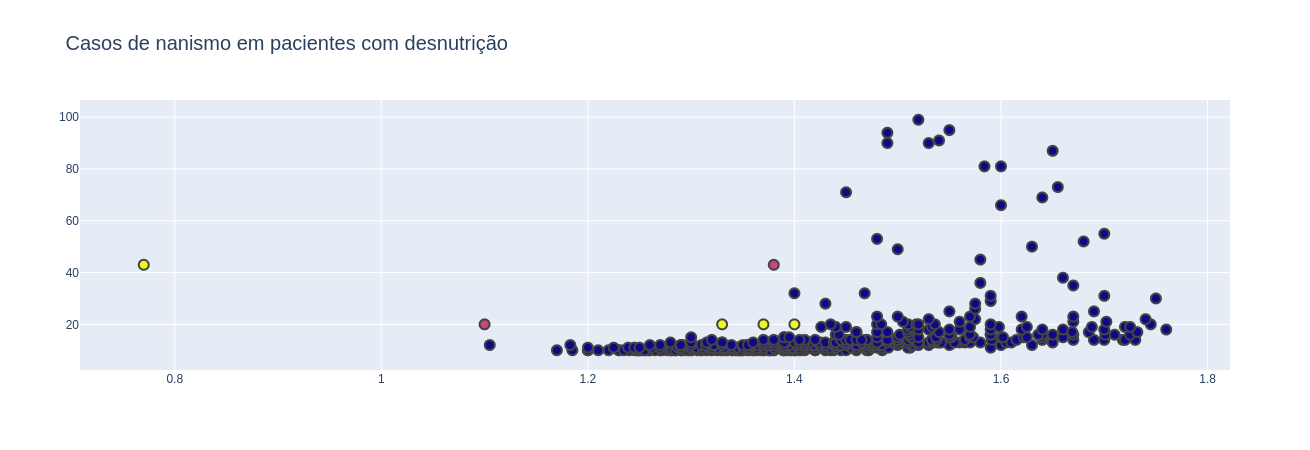

In [42]:
# filtros para gerar o gráfico
age = malnourished.groupby(by=['PCTE_ANIOS', 'PCTE_NANISMO_SEXO', 'PCTE_SEXO'])['PCTE_TALLA_M'].value_counts().index.get_level_values(0)
height = malnourished.groupby(by=['PCTE_ANIOS', 'PCTE_NANISMO_SEXO', 'PCTE_SEXO'])['PCTE_TALLA_M'].value_counts().index.get_level_values(3)
hover_filter= malnourished.groupby(by=['PCTE_ANIOS', 'PCTE_NANISMO_SEXO', 'PCTE_SEXO'])['PCTE_TALLA_M'].value_counts().index.get_level_values(2)
color_filer = malnourished.groupby(by=['PCTE_ANIOS', 'PCTE_NANISMO_SEXO', 'PCTE_SEXO'])['PCTE_TALLA_M'].value_counts().index.get_level_values(1).map({'NORMAL': 0, 'POS NANISMO MUJER': 1, 'POS NANISMO HOMBRE': 2})


# gera o gráfico scatterplot
fig = go.Figure(go.Scatter(
    x=height,
    y=age,
    hovertext=hover_filter,
    marker_color=color_filer
))

# configurações do gráfico
fig.update_layout(title_text='Casos de nanismo em pacientes com desnutrição', titlefont_size=20)
fig.update_xaxes(showspikes=True, spikecolor="#708090", spikesnap="cursor", spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="#B5B5B5", spikethickness=2)
fig.update_layout(spikedistance=1000, hoverdistance=100)
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.show()

In [22]:
malnourished.groupby(['PCTE_NANISMO_SEXO'])['PCTE_SEXO'].value_counts() # casos de nanismo dos pacientes desnutridos

PCTE_NANISMO_SEXO   PCTE_SEXO
NORMAL              Hombre       321
                    Mujer        292
POS NANISMO HOMBRE  Hombre         1
POS NANISMO MUJER   Mujer          1
Name: PCTE_SEXO, dtype: int64

In [23]:
pcte.groupby(['PCTE_NANISMO_SEXO'])['PCTE_SEXO'].value_counts() # casos de nanismo em todos os pacientes

PCTE_NANISMO_SEXO   PCTE_SEXO
NORMAL              Mujer        9995
                    Hombre       7330
POS NANISMO HOMBRE  Hombre        580
POS NANISMO MUJER   Mujer         837
Name: PCTE_SEXO, dtype: int64

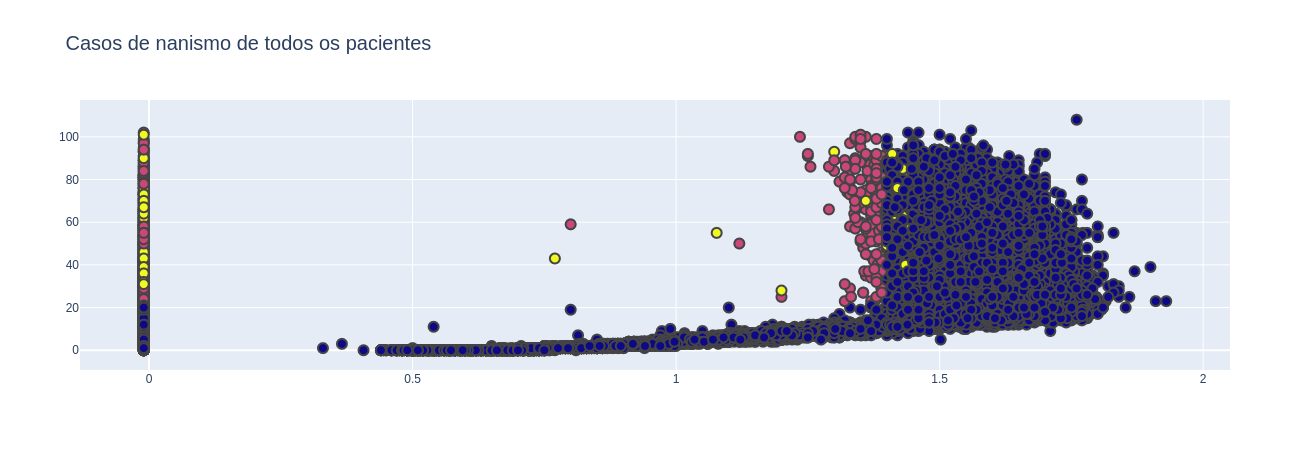

In [24]:
# gera o gráfico scatterplot
fig = go.Figure(go.Scatter(
    x=pcte['PCTE_TALLA_M'],
    y=pcte['PCTE_ANIOS'],
    hovertext=pcte['PCTE_SEXO'],
    marker_color=pcte['PCTE_NANISMO_SEXO'].map({'NORMAL': 0, 'POS NANISMO MUJER': 1, 'POS NANISMO HOMBRE': 2})
))

# configurações do gráfico
fig.update_layout(title_text='Casos de nanismo de todos os pacientes', titlefont_size=20)
fig.update_xaxes(showspikes=True, spikecolor="#708090", spikesnap="cursor", spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="#B5B5B5", spikethickness=2)
fig.update_layout(spikedistance=1000, hoverdistance=100)
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.show()

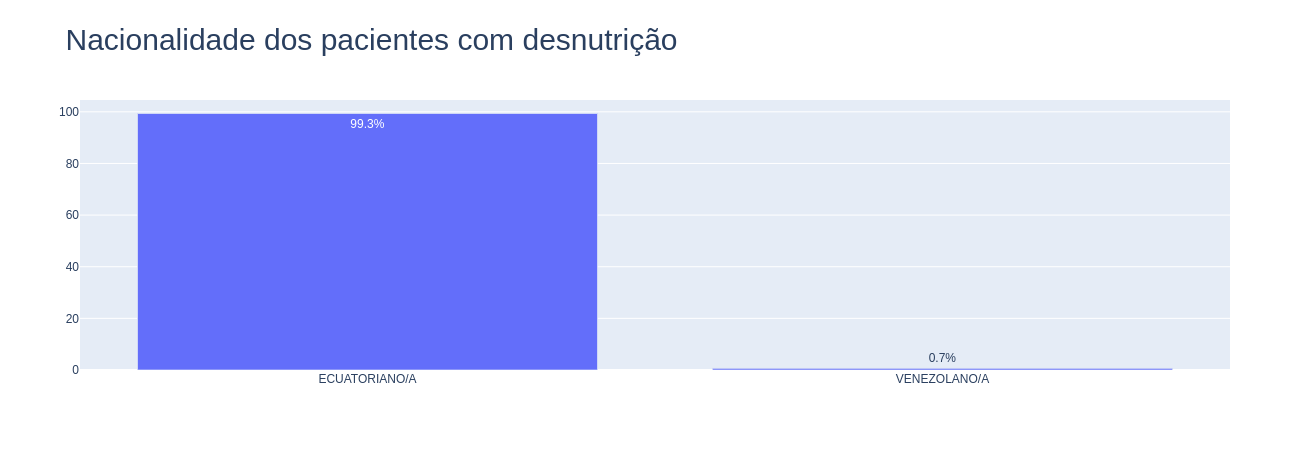

In [25]:
index = malnourished['PCTE_NACIONALIDAD'].value_counts().index
values = malnourished['PCTE_NACIONALIDAD'].value_counts().values

fig = go.Figure(data=[
    go.Bar(x=index, y=(values / malnourished.shape[0] * 100), text=['{:.1f}%'.format(v / malnourished.shape[0] * 100) for v in values], textposition='auto')
])

# Change the bar mode
fig.update_layout( title_text="Nacionalidade dos pacientes com desnutrição", titlefont_size=30)
fig.show()

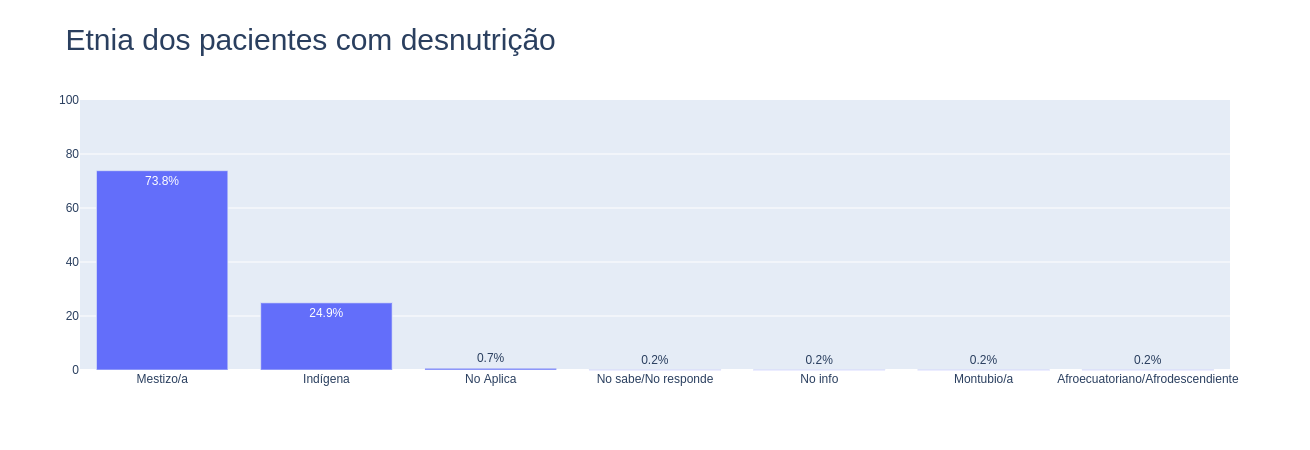

In [26]:
index = malnourished['PCTE_AUTID_ETN'].value_counts().index
values = malnourished['PCTE_AUTID_ETN'].value_counts().values

fig = go.Figure(data=[
    go.Bar(x=index, y=(values / malnourished.shape[0] * 100), text=['{:.1f}%'.format(v / malnourished.shape[0] * 100) for v in values], textposition='auto')
])

# Change the bar mode
fig.update_layout( title_text="Etnia dos pacientes com desnutrição", titlefont_size=30)
fig.update_yaxes(range=[0, 100])
fig.show()

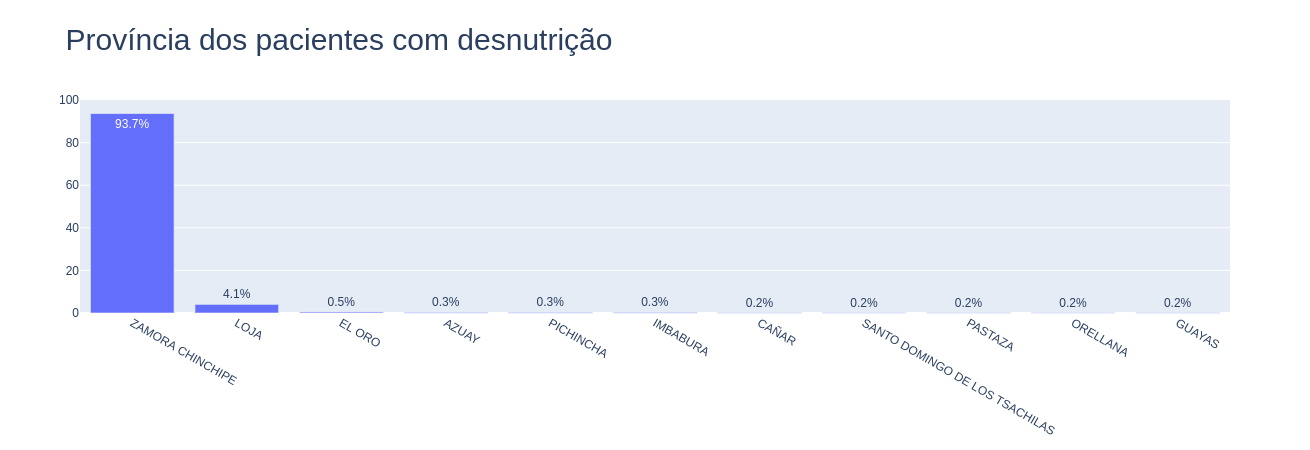

In [27]:
index = malnourished['PCTE_DES_PROV'].value_counts().index
values = malnourished['PCTE_DES_PROV'].value_counts().values

fig = go.Figure(data=[
    go.Bar(x=index, y=(values / malnourished.shape[0] * 100), text=['{:.1f}%'.format(v / malnourished.shape[0] * 100) for v in values], textposition='auto')
])

# Change the bar mode
fig.update_layout( title_text="Província dos pacientes com desnutrição", titlefont_size=30)
fig.update_yaxes(range=[0, 100])
fig.show()

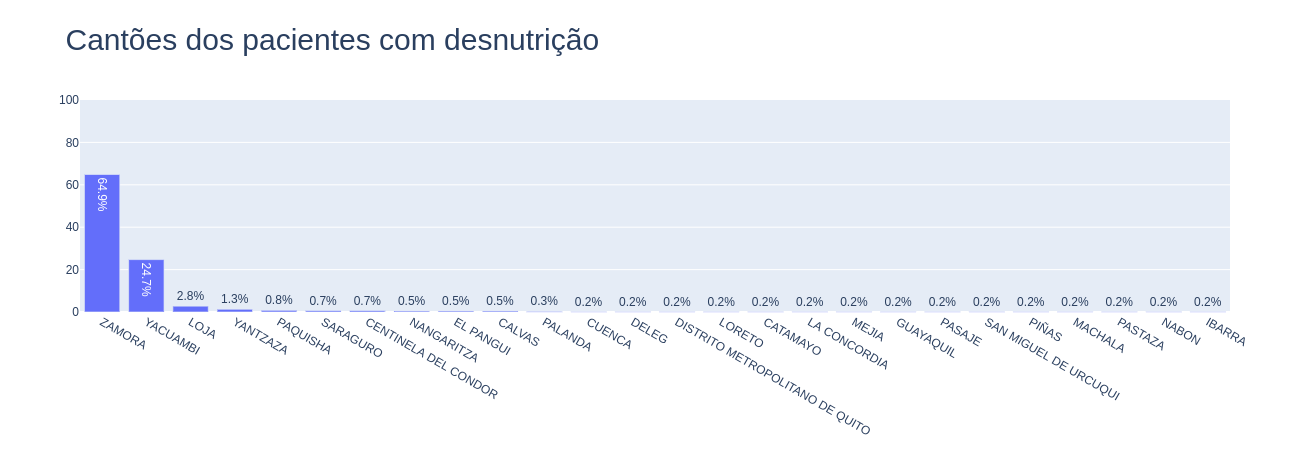

In [44]:
index = malnourished['PCTE_DES_CANT'].value_counts().index
values = malnourished['PCTE_DES_CANT'].value_counts().values

fig = go.Figure(data=[
    go.Bar(x=index, y=(values / malnourished.shape[0] * 100), text=['{:.1f}%'.format(v / malnourished.shape[0] * 100) for v in values], textposition='auto')
])

# Change the bar mode
fig.update_layout( title_text="Cantões dos pacientes com desnutrição", titlefont_size=30)
fig.update_yaxes(range=[0, 100])
fig.show()

In [29]:
# months = list((outliers.groupby(['mes','target']).count().index.get_level_values(0)).unique())

# values_inadim = outliers[outliers['target']=='INADIMPLENTE'].groupby(['mes']).count()['plano'].to_list()
# values_adim = outliers[outliers['target']=='NÃO-INADIMPLENTE'].groupby(['mes']).count()['plano'].to_list()


# total_by_month = [ values_adim[i] + values_inadim[j] for i, j in zip( range(len(values_adim)), range(len(values_inadim)) ) ]


# bar_adim = [ (values_adim[i] / total_by_month[j]) * 100 for i, j in zip( range(len(values_adim)), range(len(total_by_month)) ) ]
# bar_inadim = [ (values_inadim[i] / total_by_month[j]) * 100 for i, j in zip( range(len(values_inadim)), range(len(total_by_month)) ) ]

In [30]:
# malnourished['PCTE_NACIONALIDAD'].unique()

In [31]:
# malnourished.groupby(by='PCTE_NACIONALIDAD').count()['PCTE_NOM'].tolist()

In [32]:
# ec = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'ECUATORIANO/A']
# index_ec = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'ECUATORIANO/A'].count().index
# values_ec = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'ECUATORIANO/A'].count() / ec.shape[0]
                        
# ve = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'VENEZOLANO/A']
# index_ve = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'VENEZOLANO/A'].value_counts().index
# values_ve = malnourished[malnourished['PCTE_NACIONALIDAD'] == 'VENEZOLANO/A'].value_counts().values / ve.shape[0]

# fig = go.Figure(data=[
#     go.Bar(x=index_ec, y=values_ec, text=['{:.1f}%'.format(values_ec) for v in values], textposition='auto'),
#     #go.Bar(x=index_ve, y=values_ve, text=['{:.1f}%'.format(values_ve) for v in values], textposition='auto')
# ])

# # Change the bar mode
# fig.update_layout(barmode='group', title_text="Valores dos planos por dia dos adimplentes", titlefont_size=30)
# fig.show()